## Introduction.

 

The `sweep_design` package is written using `Python` to create and develop 
sweep signals.
  
The package contains not only tools for creation, but also tools for analysis, 
visualization and other purposes. 
    
In addition, it can be used to analyze and create other signals.  

The construction of a sweep signal is carried out according to the formula:

$$ S(t) = A(t)sin(\theta(t)+\theta_0) $$

where $t$ is the time that varies within $[0, T]$ $A(t)$ is the sweep amplitude 
change function, $\theta(t)$ is the angular sweep $\theta_0$ is the initial phase

$$ \theta(t) = 2\pi\int\limits_{0}^{t}F(\tau)d\tau $$

where $F(t)$ - frequency versus time

### An example of a linear sweep signal.

In [1]:
from sweep_design.math_signals.utility_functions import get_time

Далее построим последовательность отсчетов по времени. С временным интервалом от 0 до 10 секунд и шагом дискретизации 0.001 с.

In [2]:
dt = 0.001
time = get_time(5, dt)

2022-07-09 18:25:12.619 | INFO     | sweep_design.math_signals.utility_functions.time_axis:get_time:9 - Time axis was created with next parameters: start - 0.0, end - 5.0 dt - 0.001


The implementation of the function that builds the sweep signal is 
described in the module ```sweep_design``` with
using the class ```UncalculatedSweep```

In [3]:
from sweep_design import UncalculatedSweep

The `time` parameter of the class constructor is passed an array of time changes.

In [4]:
usw = UncalculatedSweep(time=time)

This creates an instance of an uncomputed sweep.
To get a sweep signal, you need to call an instance of the class.

In [5]:
sw = usw()

Let's retrieve the data from the Sweep class instance using 
the ```get_data()``` method.
  
It returns a ```tuple``` object. The first element of which is the 
sequence ```npumpy.ndarray``` specifying the time,
and the second element is the sequence ```numpyp.ndarray``` describing 
he change in the amplitude of the sweep signal.

The result can then be passed to the ```plot``` method of 
the ```matplotlib.pyplot``` module and the sweep image plotted. 

In [6]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sweep-signal')

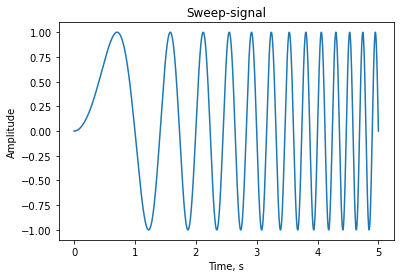

In [7]:
t_sw, a_sw = sw.get_data()
plt.plot(t_sw, a_sw)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Sweep-signal')

### Next example.

As a change in frequency over time, we take the function:

$$F(t) = sin(2\pi t/10)/2\cdot9+1 $$

where $t$ - time

It is described below as a function **f_t**.

As a change in the amplitude envelope with time, we take the Tukey window 
function, in N samples

$$ w[n] = 
\begin{cases} 
    \frac{1}{2}[1-cos(\frac{2\pi n}{\alpha N})], & 0 \le m < \frac{\alpha N}{2} 
    \\ 1, & \frac{\alpha N}{2} \le t < \frac{N}{2} 
    \\ w[N-n], & 0 \le n \le \frac{N}{2} 
\end{cases}   $$

where $n$ - sample, $N$ - total samples, $\alpha$ - coefficient from 0 to 1

By using the tukey function from the `scipy` library.
Specifying the number of samples as the length of the array along the 
time axis and taking $\alpha$ = 0.3.

It is described below as a function of **a_t**.

In [8]:
from scipy.signal.windows import tukey
import numpy as np

In [9]:
def f_t(time: np.ndarray) -> np.ndarray:
    return (np.sin(time*2*np.pi/10)+1)/2*9+1
def a_t(time: np.ndarray) -> np.ndarray:
    return tukey(time.size, alpha=0.2)

Next, we construct a sequence of readings in time. With a time interval 
from 0 to 50 seconds and a sampling step of 0.01 s.

In [10]:
time = get_time(50, dt)

2022-07-09 18:25:12.904 | INFO     | sweep_design.math_signals.utility_functions.time_axis:get_time:9 - Time axis was created with next parameters: start - 0.0, end - 50.0 dt - 0.001


Getting an instance of the class is done by passing three parameters to 
the ```UncalculatedSweep``` class constructor:

time - time,
  
frequency_time - frequency versus time function,
  
amplitude_time - a function of amplitude versus time.

In [11]:
usw = UncalculatedSweep(time=time, frequency_time=f_t, amplitude_time=a_t)

To get a result describing a sweep, the signal must be called with an 
instance of the ```UncalculatedSweep``` class.

The result of the call is the ```Sweep``` class from the module
```sweep_design.math_signals.math_sweep```

In [12]:
sw = usw()

Text(0.5, 1.0, 'Sweep-signal')

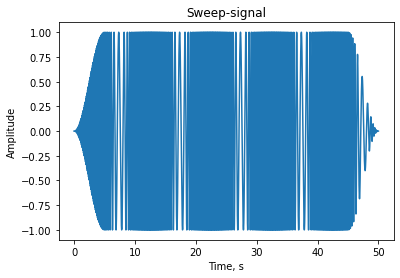

In [13]:
t_sw, a_sw = sw.get_data()
plt.plot(t_sw, a_sw)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Sweep-signal')

An instance of the Sweep class also has an **frequency_time** property.

Represented by an instance of the ```Relation``` class from the 
sweep_design.math_signals.math_relation module

This instance also has a ```get_data()``` method that returns the same type 
as the get_data method described above.

Similarly, you can plot the change in frequency over time.

In [14]:
from sweep_design.math_signals.prepared_sweeps import get_shuffle

In [15]:
sw = get_shuffle(time)

Text(0.5, 1.0, 'Frequency-Time')

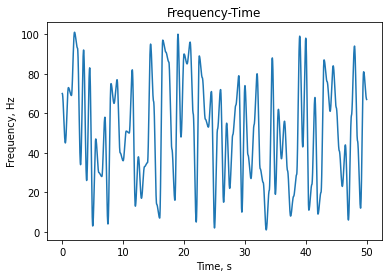

In [16]:
time_f_t, amp_f_t = sw.frequency_time.get_data()
plt.plot(time_f_t, amp_f_t)
plt.xlabel('Time, s')
plt.ylabel('Frequency, Hz')
plt.title('Frequency-Time')

Similarly to what was said above, there is a property **amplitude_time** that 
describes the change in amplitude with time.
  
You can also build a graph.

Text(0.5, 1.0, 'Amplitude-Time')

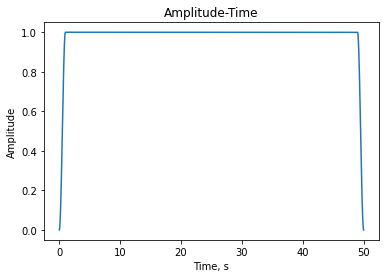

In [17]:
time_a_t, amp_a_t =sw.amplitude_time.get_data()
plt.plot(time_a_t, amp_a_t)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Amplitude-Time')

***
## Construction of a sweep signal from a priori data
  
There is another possibility of building a sweep signal using **a priori data**.
  
To do this, you need to use the ```ApriorUncalculatedSweep``` class from 
the module ```sweep_design.math_signals.math_uncalcsweep```.

This class inherits from ```UncalculatedSweep``` from the same module.

The difference lies in the arguments it takes to construct an instance 
of the class.

The first argument time is responsible for a time.

The second argument is responsible for a priori data, it can be an instance 
of a class: ```Relation```, ```Signal```, ```Spectrum``` или ```Sweep```. 
(Classes ```Signal```, ```Spectrum``` from module 
```sweep_design.math_signals.math_signal```)
  
The third argument is responsible for the method (function), with the help 
of which functions or sequences of frequency versus time and amplitude versus 
time will be extracted.
  
The extracted functions (amlitude_time, frequency_time) will then be 
passed to the superclass ```UncalculatedSweep```.
  
Further calling an instance of the ```ApriorUncalculatedSweep``` class 
is similar to calling an instance of the ```UncalculatedSweep``` class, 
which returns an instance of the ```Sweep``` class.
  
Consider an example of obtaining a sweep signal from a Reeker impulse. 
We will also use the function to receive a signal 
from the ```scipy``` library.

In [18]:
from scipy.signal import ricker
from sweep_design import Signal

In [19]:
T_ricker = 1
t_ricker = get_time(T_ricker, dt)
rick = ricker(t_ricker.size, a = 1)
ricker_signal = Signal(t_ricker, rick)

2022-07-09 18:25:17.656 | INFO     | sweep_design.math_signals.utility_functions.time_axis:get_time:9 - Time axis was created with next parameters: start - 0.0, end - 1.0 dt - 0.001


Text(0.5, 1.0, 'Ricker signal')

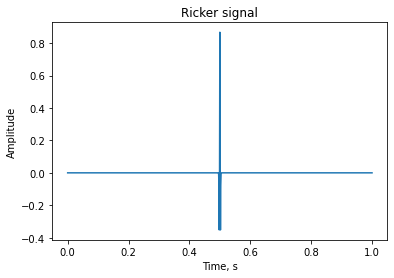

In [20]:
t_r2, a_r2 = ricker_signal.get_data()
plt.plot(t_r2, a_r2)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Ricker signal')


In [21]:
from sweep_design import ApriorUncalculatedSweep

In [22]:
usw2 = ApriorUncalculatedSweep(time = time, aprior_data=ricker_signal)
sw2 = usw2()

The `ftat_method` parameter is optional. The default function 
is ```simple_freq2time``` from Config class ```sweep_design.config```
```python
def simple_freq2time(spectrum: 'Spectrum') -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    f, A = spectrum.get_amp_spectrum().get_data()
    n_spec = A ** 2
    nT = np.append([0.], ((n_spec[1:]+n_spec[:-1])/(f[1:]-f[:-1])).cumsum())
    coef = integrate.trapz(n_spec, f)
    a_t = sqrt(coef*2)*np.ones(len(nT))
    return nT, f, a_t
``` 

Text(0.5, 1.0, 'Sweep-signal')

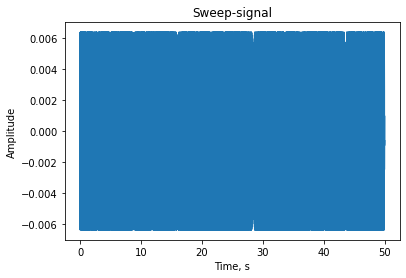

In [23]:
t_sw2, a_sw2 = sw2.get_data()
plt.plot(t_sw2, a_sw2)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Sweep-signal')


The result is a non-linear sweep signal whose amplitude spectrum is similar 
to the amplitude spectrum of the transmitted spectrum of the Reeker signal.
  
You can verify this by using the execution of sequences of functions:

1. On instances of the ```Sweep``` and ```Signal``` classes, which are 
**sw2** and **aprior_signal**, you can call the ```get_amplitude_spectrum()``` 
method, which returns an instance of the class ```Relation``` describing 
the amplitude spectrum of the signals.

2. And finally, as in the previous examples, retrieve the data using the 
```get_data()``` method and pass the result to the ```plt.plot()``` method     

Text(0.5, 1.0, 'Amplitude Spectrum')

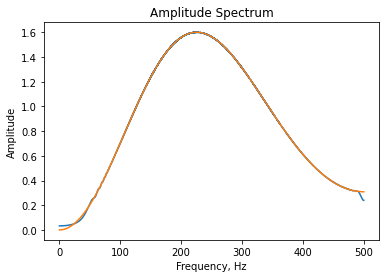

In [24]:
norm_sweep = sw2.get_norm()
freq_f_t2, amp_f_t2 = sw2.get_amplitude_spectrum().get_data()
plt.plot(freq_f_t2, amp_f_t2)
freq_f_t3, amp_f_t3 = ricker_signal.get_amplitude_spectrum().get_data()
plt.plot(freq_f_t3, amp_f_t3)
plt.xlabel('Frequency, Hz')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum')


The ```ApriorUncalculatedSweep``` **ftat_method** input argument determines 
how the frequency vs. time and amplitude vs. time functions will be calculated.
  
It can be a user-defined function that returns the desired result.
  
The input parameters of the function is an instance of class ```Spectrum```, 
and the output parameters are an instance of ```tuple``` object, in the 
first place of which is the new time sequence. 
In the second and third places are the corresponding functions or sequences 
of changes in frequency and amplitude.

***
## Additional features.
The above examples describe a small mathematical part of the ```sweep_design``` 
module. All mathematical operations (addition, multiplication, etc.) on class 
instances and other opportunities, are also possible. See the documentation 
for more details.

At the end, I will add that there is an extension of the mathematical part 
(```sweep_design.named_signals```), which presents a description of the results 
obtained. Also written a small GUI for visualization, analysis and work with data.

Below is an example of them.

***
To assign names and categories, classes have been created that repeat the 
behavior of the classes described above and are a composition of these classes 
and classes from the ```sweep_design.named_signals.header_signals``` module.

The ```NamedRelation``` class located in 
```sweep_design.named_signals.named_relation``` is similar to the ```Relation``` 
class described above. The difference is that, in addition to the `x` and 
`y` variables, the class constructor takes a `name` - name and a 
`category` - category, which are strings. They are used in the following 
for description and design.

Similar description for the following classes:  
* The ```NamedSignals``` class located in 
```sweep_design.named_signals.named_signal``` is similar to the ```Signal``` 
class described above.
* The ```NamedSpectrum``` class located in 
```sweep_design.named_signals.named_signal``` is similar to the ```Spectrum``` 
class described above.
* The ```NamedRelation``` class located in 
```sweep_design.named_signals.named_sweep``` is similar to the ```Sweep``` 
class described above.

Consider the example below of creating an instance of the ```NamedSignals``` 
class.

Similar to the Signal class, we pass in the t_ricker and rick variables 
obtained in the previous step and pass the desired name and category to 
the constructor of the ```NamedSignal``` class.

In [25]:
from sweep_design import NamedSignal

In [26]:
named_ricker = NamedSignal(t_ricker, rick, 'My fist Ricker signal', 'signal')

The `NamedRelation` classes and other classes inherited from it: `NamedSignal`, 
`NamedSpectrum` and `NamedSweep`, can take a different number of parameters and 
different types, see the documentation for more details.  
An example of creating the same `Ricker` signal, but in a slightly different 
way, is given below.

In [27]:
named_ricker_2 = NamedSignal(ricker_signal) # recker_signal полученный на предыдущем этапе, являющийся экземпляром класса Signal

The difference is that this time one parameter was passed.
And the difference lies in the assigned names.

In [28]:
print(named_ricker)
print('=============================================================')
print(named_ricker_2)

My fist Ricker signal
named_ricker_2


We will also do the same for the already received sweep signal.

In [29]:
from sweep_design import NamedSweep

In [35]:
shuffle = NamedSweep(sw)
ricker_sweep = NamedSweep(sw2)

Now let's see what it was for.
  
From the `sweep_design.view` module, import the 
`get_view_sweep_bokeh_ipywidget` function
The function returns an instance of the class for creating data visualization 
windows in `Jupyter Notebook`, `JupyterLab` and other similar notebooks.
(In some notebooks and IDE it may not work correctly).
  
The return object of `get_view_sweep_bokeh_ipywidget` builds a window 
using the `ipywidgets` and `bokeh` libraries. 
  
You can create your own classes for building an image (See the documentation). 

In [36]:
from sweep_design.view import get_view_sweep_bokeh_ipywidget

In [41]:
bokeh_view = get_view_sweep_bokeh_ipywidget(0.5, 0.5)

In [42]:
bokeh_view.add(shuffle)
bokeh_view.add(ricker_sweep)
bokeh_view.add(named_ricker)
bokeh_view.add(named_ricker_2)

In [43]:
bokeh_view.show()

## Conclusion.
  
The documentation contains more detailed usage of modules, classes and 
their functions and methods.
  
The module also has the ability to change class attributes to change 
behavior and calculations. 
  
If they are not enough, nothing prevents them from rewriting or 
supplementing them.  